In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing DataFrame
sightings = pd.read_csv('scrubbed.csv')

c:\users\emily\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


UFO Sightings: Data Exploration

Overview of the Data:
The dataset I am working with is a compilation of over 80,000 reports of unidentified flying objects (UFOs) over the last century. The reports were collected by the National UFO Reporting Center (NUFORC). It's important to note that NUFORC is an organization that is based in the United States, and a first quick look at the data will show that the majority of the UFO sightings in this data set are in the U.S. 

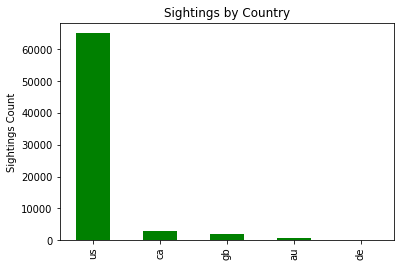

In [3]:
#Sightings by Country
sightings.country.value_counts().plot(kind='bar', color='g')
plt.ylabel('Sightings Count')
plt.title('Sightings by Country')
plt.show()

Because sightings in the US make up such a large percentage of this dataset, this report will primarily focus on the US sightings. In addition to the 'country' field, the data also includes fields for datetime, city, state, shape, duration (seconds), duration (hours/min), comments, date posted, latitude, and longitude. My analysis on the data primarily focuses on the differences in sightings between the geographic areas of the US, so the variables I will be using are state, and shape. Before diving into the analytical questions, I have run some summary value counts and statistics on the main variables in use. 

In [4]:
us_sightings = pd.DataFrame(sightings[sightings['country'].str.contains('us', na = False)])

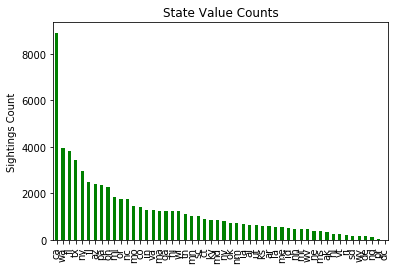

In [5]:
#State Value Counts 
us_sightings.state.value_counts().plot(kind='bar', color='g')
plt.ylabel('Sightings Count')
plt.title("State Value Counts")
plt.show()

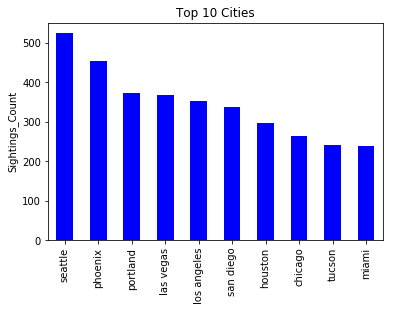

In [6]:
#Value Count of Cities
us_sightings.city.value_counts().head(10).plot(kind='bar', color='b')
plt.ylabel('Sightings_Count')
plt.title("Top 10 Cities")
plt.show()

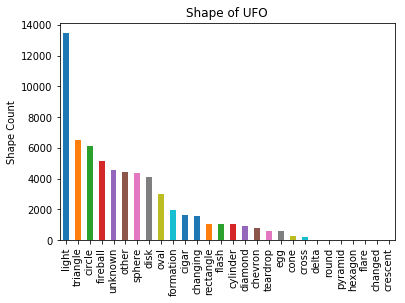

In [7]:
#Value Count of Shapes
us_sightings['shape'].value_counts().plot(kind='bar')
plt.ylabel('Shape Count')
plt.title('Shape of UFO')
plt.show()


Analytic Questions: 
#1 Which states in the US have the highest likelihood of UFO sightings and what is the average amount of sightings for these states?  

To do this, I first looked at the top 10 states with the most sightings. California is an outlier, with almost double the sightings of any other state. To get a better understanding of the average amount of sightings in the top 10 states, I removed California. 

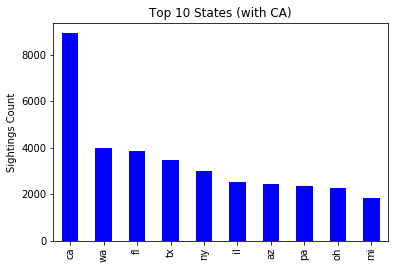

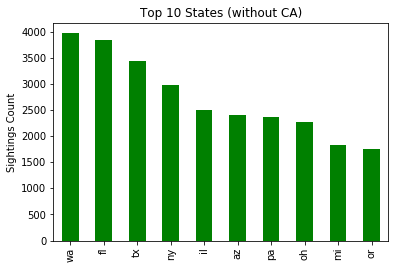

In [8]:

#With CA
us_sightings.state.value_counts().head(10).plot(kind='bar', color='b')
plt.ylabel('Sightings Count')
plt.title("Top 10 States (with CA)")
plt.show()

#Remove CA

us_sightings_noca = us_sightings[us_sightings['state'] != 'ca']
us_sightings_noca.state.value_counts().head(10).plot(kind='bar', color='g')
plt.ylabel('Sightings Count')
plt.title("Top 10 States (without CA)")
plt.show()

Without California, the state with the most sightings is Washington. Since NUFORC is based out of Washington, this is not surprising. The average number of UFO sightings is 2736.5. 

In [9]:
#Average number of sightings for top 10 states
np.mean(us_sightings_noca['state'].value_counts().head(10))

2736.5

#2 What are the most common shapes of UFOs that people report seeing? 

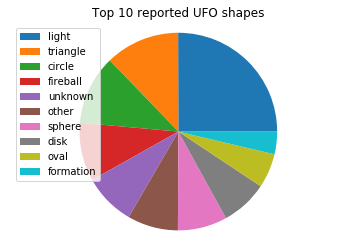

In [10]:
plt.pie(us_sightings['shape'].value_counts().head(10))
plt.title('Top 10 reported UFO shapes')
plt.axis('equal')
plt.legend(us_sightings['shape'].value_counts().head(10).index)
plt.show()

Light is the most common shape that people report seeing, followed by triangle, circle, and fireball. 

#3 Are there any differences in sightings reported outside of the US? 
Based on earlier analysis, I already know that one of the differences is the number of sightings reported - there are many more in the US (perhaps because NUFORC is located here). To compare, I first created a dataframe of sightings reported outside the US. 

In [11]:
#Dataframe of Non US sightings
nonus_sightings = sightings[sightings['country'] != 'us']


We know from the previous question what the Top 10 shapes reported in the US are. Does that list differ outside the US? 

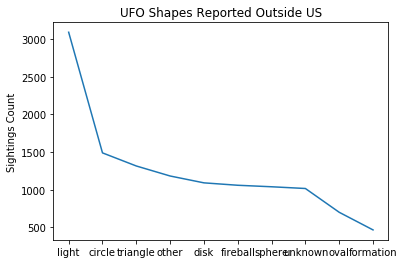

In [12]:
#Top Shapes Reported Outside US
plt.plot(nonus_sightings['shape'].value_counts().head(10))
plt.ylabel("Sightings Count")
plt.title("UFO Shapes Reported Outside US")
plt.show()

Light is the number 1 shape reported both in and outside of the US. Circle and Triangle also make the Top 5 for both datasets, although in a different order. Overall, the most common shapes reported outside the US appear to be the same as those reported in it, just in a slightly different order. Given that the data is showing us that there does not appear to be a difference in the populations inside and outside of the US (at least when it comes to shape), I ran a t test to confirm. I first had to convert the 'shape' strings, into numbers for analysis. 

In [20]:
#Converting Shape strings to numbers

us_sightings[us_sightings['shape'] == 'light'] = 1
us_sightings[us_sightings['shape'] == 'circle'] = 2
us_sightings[us_sightings['shape'] == 'triangle'] = 3
us_sightings[us_sightings['shape'] == 'other'] = 4
us_sightings[us_sightings['shape'] == 'disk'] = 5
us_sightings[us_sightings['shape'] == 'fireball'] = 6
us_sightings[us_sightings['shape'] == 'sphere'] = 7
us_sightings[us_sightings['shape'] == 'unknown'] = 8
us_sightings[us_sightings['shape'] == 'oval'] = 9
us_sightings[us_sightings['shape'] == 'formation'] = 10

nonus_sightings[nonus_sightings['shape'] == 'light'] = 1
nonus_sightings[nonus_sightings['shape'] == 'circle'] = 2
nonus_sightings[nonus_sightings['shape'] == 'triangle'] = 3
nonus_sightings[nonus_sightings['shape'] == 'other'] = 4
nonus_sightings[nonus_sightings['shape'] == 'disk'] = 5
nonus_sightings[nonus_sightings['shape'] == 'fireball'] = 6
nonus_sightings[nonus_sightings['shape'] == 'sphere'] = 7
nonus_sightings[nonus_sightings['shape'] == 'unknown'] = 8
nonus_sightings[nonus_sightings['shape'] == 'oval'] = 9
nonus_sightings[nonus_sightings['shape'] == 'formation'] = 10

#Create Samples of US and Non US populations using Top 10 Shapes
us_sightings_sample = us_sightings['shape'].value_counts().head(10)
nonus_sightings_sample = nonus_sightings['shape'].value_counts().head(10)


c:\users\emily\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\emily\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\emily\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [23]:
#T-Test
from scipy.stats import ttest_ind
print(ttest_ind(nonus_sightings_sample, us_sightings_sample, equal_var=False))

Ttest_indResult(statistic=-4.064809113566306, pvalue=0.0023075364802730516)


Since the pvalue is low, we can be fairly confident in what the data is showing us: in other words, there is no real difference in the populations. This is useful to know for further study. Since the majority of data we have so far is only from the US, we can use the US data to analyze UFO sightings and be confident that the conclusions we make can be applied to sightings outside the US as well. 

Proposed Further Research